In [1]:
import networkx as nx
import pandas as pd
import os
import gurobipy as gp
from gurobipy import GRB
import numpy as np
import matplotlib.pyplot as plt
import random
from itertools import islice
import time
from all_forms import all_formulations

In [2]:
# read demands
demand = open('Sprint/demand.txt', 'r')
lines = demand.readlines()
demands = []

for line in lines:
    demands.append(line.split())

demands = np.array(demands, dtype = float)
demands = np.max(demands, axis=0) #use the maximum demand over all times (rows) for each node-node pair

#demand = [float(i) for i in line.split()]
# n = int(len(demands)**0.5)
# demand = np.array(demands).reshape(n, n)

# np.fill_diagonal(demand, 0) #demand from a node to itself should be 0

In [3]:
def createGraph(n):
  edges = []
  cap = 1000000000
  for i in range(n-1):
      edges.append((int(i), int(i+1), int(cap)))
  edges.append((int(0), int(n-1), int(cap)))
  for i in range(n):
    for j in range(2):
      node = (i + random.randint(1, n-1)) % n
      tail = min(i, node)
      head = max(i, node)
      if (int(tail), int(head), int(cap)) not in edges:
          edges.append((int(tail), int(head), int(cap)))

  # generate graph
  G = nx.Graph()
  G.add_weighted_edges_from(edges)

  return G

In [4]:
def k_shortest_paths(G, source, target, k, weight=None):
    return list(
        islice(nx.shortest_simple_paths(G, source, target, weight=weight), k)
    )

In [5]:
def getDemand(n):
  newDemand = demands[np.random.choice(range(len(demands)), n**2)]
  newDemand = np.array(newDemand).reshape(n, n)
  np.fill_diagonal(newDemand, 0)
  return newDemand

In [6]:
res = {'maxThroughput' : [], 'minMLUObj' : [], 'minMLUConstraint': []}

In [7]:
G5 = createGraph(5)
demand5 = getDemand(5)
runtime5_maxThroughput, runtime5_minMLUObj, runtime5_minMLUConstraint = all_formulations(G5, demand5, 5)

res['maxThroughput'].append(runtime5_maxThroughput)
res['minMLUObj'].append(runtime5_minMLUObj)
res['minMLUConstraint'].append(runtime5_minMLUConstraint)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-04-17
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 36 rows, 108 columns and 348 nonzeros
Model fingerprint: 0x019400d3
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+03, 1e+09]
Presolve removed 36 rows and 108 columns
Presolve time: 0.10s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.8119056e+06   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.11 seconds (0.00 work units)
Optimal objective  2.811905551e+06
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instr

In [8]:
G10 = createGraph(10)
demand10 = getDemand(10)
runtime10_maxThroughput, runtime10_minMLUObj, runtime10_minMLUConstraint = all_formulations(G10, demand10, 10)

res['maxThroughput'].append(runtime10_maxThroughput)
res['minMLUObj'].append(runtime10_minMLUObj)
res['minMLUConstraint'].append(runtime10_minMLUConstraint)

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 140 rows, 475 columns and 1538 nonzeros
Model fingerprint: 0xba1bf18f
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 1e+09]
Presolve removed 140 rows and 475 columns
Presolve time: 0.02s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.9855783e+07   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.03 seconds (0.00 work units)
Optimal objective  2.985578273e+07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using u

In [9]:
G25 = createGraph(25)
demand25 = getDemand(25)
runtime25_maxThroughput, runtime25_minMLUObj, runtime25_minMLUConstraint = all_formulations(G25, demand25, 25)

res['maxThroughput'].append(runtime25_maxThroughput)
res['minMLUObj'].append(runtime25_minMLUObj)
res['minMLUConstraint'].append(runtime25_minMLUConstraint)

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 744 rows, 3072 columns and 11306 nonzeros
Model fingerprint: 0xadd085be
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 1e+09]
Presolve removed 744 rows and 3072 columns
Presolve time: 0.02s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.5970386e+08   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.03 seconds (0.00 work units)
Optimal objective  1.597038619e+08
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, usin

In [10]:
G50 = createGraph(50)
demand50 = getDemand(50)
runtime50_maxThroughput, runtime50_minMLUObj, runtime50_minMLUConstraint = all_formulations(G50, demand50, 50)


res['maxThroughput'].append(runtime50_maxThroughput)
res['minMLUObj'].append(runtime50_minMLUObj)
res['minMLUConstraint'].append(runtime50_minMLUConstraint)

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2736 rows, 12393 columns and 51396 nonzeros
Model fingerprint: 0x484bff5b
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 1e+09]
Presolve removed 2736 rows and 12393 columns
Presolve time: 0.12s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.0145546e+08   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.14 seconds (0.02 work units)
Optimal objective  6.014554634e+08
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, 

In [11]:
G100 = createGraph(100)
demand100 = getDemand(100)
runtime100_maxThroughput, runtime100_minMLUObj, runtime100_minMLUConstraint = all_formulations(G100, demand100, 100)


res['maxThroughput'].append(runtime100_maxThroughput)
res['minMLUObj'].append(runtime100_minMLUObj)
res['minMLUConstraint'].append(runtime100_minMLUConstraint)

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 10488 rows, 49794 columns and 226170 nonzeros
Model fingerprint: 0x612f86e3
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 1e+09]
Presolve removed 10488 rows and 49794 columns
Presolve time: 0.14s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.3615094e+09   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.19 seconds (0.07 work units)
Optimal objective  2.361509440e+09
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processor

In [12]:
G200 = createGraph(200)
demand200 = getDemand(200)
runtime200_maxThroughput, runtime200_minMLUObj, runtime200_minMLUConstraint = all_formulations(G200, demand200, 200)


res['maxThroughput'].append(runtime200_maxThroughput)
res['minMLUObj'].append(runtime200_minMLUObj)
res['minMLUConstraint'].append(runtime200_minMLUConstraint)

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 40994 rows, 199597 columns and 983222 nonzeros
Model fingerprint: 0x7b88e706
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 1e+09]
Presolve removed 40994 rows and 199597 columns
Presolve time: 0.31s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.2047231e+09   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.42 seconds (0.32 work units)
Optimal objective  9.204723072e+09
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical process

In [13]:
G300 = createGraph(300)
demand300 = getDemand(300)
runtime300_maxThroughput, runtime300_minMLUObj, runtime300_minMLUConstraint = all_formulations(G300, demand300, 300)


res['maxThroughput'].append(runtime300_maxThroughput)
res['minMLUObj'].append(runtime300_minMLUObj)
res['minMLUConstraint'].append(runtime300_minMLUConstraint)

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 91482 rows, 449391 columns and 2335448 nonzeros
Model fingerprint: 0x34bf400b
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 1e+09]
Presolve removed 91482 rows and 449391 columns
Presolve time: 0.80s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.1055814e+10   0.000000e+00   0.000000e+00      1s

Solved in 0 iterations and 0.99 seconds (0.78 work units)
Optimal objective  2.105581378e+10
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical proces

In [14]:
G400 = createGraph(400)
demand400 = getDemand(400)
runtime400_maxThroughput, runtime400_minMLUObj, runtime400_minMLUConstraint = all_formulations(G400, demand400, 400)


res['maxThroughput'].append(runtime400_maxThroughput)
res['minMLUObj'].append(runtime400_minMLUObj)
res['minMLUConstraint'].append(runtime400_minMLUConstraint)

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 161982 rows, 799191 columns and 4291126 nonzeros
Model fingerprint: 0xe8ea1905
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 1e+09]
Presolve removed 47161 rows and 609143 columns (presolve time = 5s) ...
Presolve removed 161982 rows and 799191 columns
Presolve time: 5.78s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.7214464e+10   0.000000e+00   0.000000e+00      6s

Solved in 0 iterations and 6.24 seconds (1.57 work units)
Optimal objective  3.721446387e+10
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instru

In [15]:
pd.DataFrame(res).to_csv('time_results.csv')

In [18]:
times_df

,maxThroughput,minMLUObj,minMLUConstraint
0,0.116,0.035,0.027
1,0.033,0.030,0.031
2,0.038,0.060,0.081
3,0.152,0.530,0.508
4,0.196,0.519,1.181
5,0.419,1.098,1.690
6,0.998,3.012,5.668
7,6.251,11.083,24.301


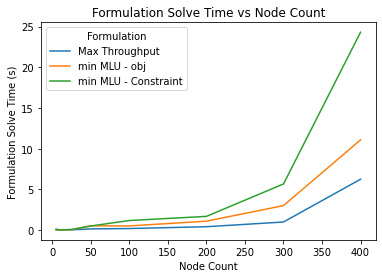

In [17]:
nodes_cnt = [5, 10, 25, 50, 100, 200, 300, 400]
formulation = ['Max Throughput', 'min MLU - obj', 'min MLU - Constraint']
times_df = pd.read_csv('time_results.csv').drop(['Unnamed: 0'], axis=1)

for i, col in enumerate(times_df.columns):
    plt.plot(nodes_cnt, times_df[col], label = formulation[i])

plt.title('Formulation Solve Time vs Node Count')
plt.legend(title = 'Formulation')
plt.xlabel('Node Count')
plt.ylabel('Formulation Solve Time (s)')
plt.show()
